<a href="https://colab.research.google.com/github/ife-dolapo/Data-Analytics-and-Artificial-Intelligence-Project/blob/main/Project_1_Data_Collection_and_Initial_Analysis_of_Stock_Market_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 1: Data Collection
# Load the dataset into a Pandas DataFrame. Ensure you understand the format and types of each column in each dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Historical stock price dataset
stock_pricesdf = pd.read_csv('historical_stock_prices.csv')
print(stock_pricesdf.head())

# Load Historical stocks dataset
stocksdf = pd.read_csv('historical_stocks.csv')
print(stocksdf.head())

# Datatypes for each dataset
print("\n",stock_pricesdf.dtypes)
print("\n",stocksdf.dtypes)
print()

# Info of each dataset
print("\n",stock_pricesdf.info())
print()
print("\n",stocksdf.info())

#

  ticker   open  close  adj_close    low   high   volume        date
0    AHH  11.50  11.58   8.493155  11.25  11.68  4633900  2013-05-08
1    AHH  11.66  11.55   8.471151  11.50  11.66   275800  2013-05-09
2    AHH  11.55  11.60   8.507822  11.50  11.60   277100  2013-05-10
3    AHH  11.63  11.65   8.544494  11.55  11.65   147400  2013-05-13
4    AHH  11.60  11.53   8.456484  11.50  11.60   184100  2013-05-14
  ticker exchange                                    name             sector  \
0    PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
1  PIHPP   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
2   TURN   NASDAQ                180 DEGREE CAPITAL CORP.            FINANCE   
3   FLWS   NASDAQ                 1-800 FLOWERS.COM, INC.  CONSUMER SERVICES   
4   FCCY   NASDAQ           1ST CONSTITUTION BANCORP (NJ)            FINANCE   

                     industry  
0  PROPERTY-CASUALTY INSURERS  
1  PROPERTY-CASUALTY INSURERS  
2  FINANC

In [ ]:
# Task 2: Data Cleaning
# Identify and handle missing values in the datasets.
print("Missing Values in historical stock prices:\n",stock_pricesdf.isnull().sum())
print("\nMissing Values in historical stocks:\n",stocksdf.isnull().sum())

# Handle missing values
stocksdf.fillna('Unknown', inplace=True)

# Missing values after filling
print("\nMissing Values in historical stocks after filling:\n",stocksdf.isnull().sum())

# Check for duplicate entries and remove them if any.
print("\nDuplicate entries in historical stock prices:\n",stock_pricesdf.duplicated().sum())
print("\nDuplicate entries in historical stocks:\n",stocksdf.duplicated().sum())

# Convert the ’Date’ column to a datetime format.
stock_pricesdf['date'] = pd.to_datetime(stock_pricesdf['date'])

# Set 'Date' column as index of the DataFrame
stock_pricesdf.set_index('date', inplace=True)



Missing Values in historical stock prices:
 ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

Missing Values in historical stocks:
 ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64

Missing Values in historical stocks after filling:
 ticker      0
exchange    0
name        0
sector      0
industry    0
dtype: int64

Duplicate entries in historical stock prices:
 0

Duplicate entries in historical stocks:
 0


In [ ]:
print(stock_pricesdf.columns)
print(stock_pricesdf.head())

Index(['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume'], dtype='object')
           ticker   open  close  adj_close    low   high   volume
date                                                             
2013-05-08    AHH  11.50  11.58   8.493155  11.25  11.68  4633900
2013-05-09    AHH  11.66  11.55   8.471151  11.50  11.66   275800
2013-05-10    AHH  11.55  11.60   8.507822  11.50  11.60   277100
2013-05-13    AHH  11.63  11.65   8.544494  11.55  11.65   147400
2013-05-14    AHH  11.60  11.53   8.456484  11.50  11.60   184100


In [ ]:
# Task 3: Data Segmentation by Decade
# Create a new column in the DataFrame for prices to represent the decade.

def get_decade(date): # function to get decade from the date entered
    return date.year // 10 * 10

stock_pricesdf['decade'] = stock_pricesdf.index.map(get_decade)
stock_pricesdf['decade'].head()

,decade
date,
2013-05-08,2010
2013-05-09,2010
2013-05-10,2010
2013-05-13,2010
2013-05-14,2010


In [ ]:
# Task 3 contd:
#Segment the data into separate DataFrames for each decade for easier comparative analysis.
decade_dfs = {}
for decade in stock_pricesdf['decade'].unique():
    decade_dfs[decade] = stock_pricesdf[stock_pricesdf['decade'] == decade]


In [ ]:
# Task 4: Exploratory Data Analysis by Decade
# Merge the stock_prices dataset with the stocks dataset using the appropriate key to include sector information with the stock prices.
merge_df = pd.merge(stock_pricesdf, stocksdf, on='ticker', how='left')

# Re-adjust the index
merge_df.index = stock_pricesdf.index
merge_df.head()

,ticker,open,close,adj_close,low,high,volume,decade,exchange,name,sector,industry
date,,,,,,,,,,,,
2013-05-08,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-09,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-10,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-13,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE
2013-05-14,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2010,NYSE,"ARMADA HOFFLER PROPERTIES, INC.",FINANCE,REAL ESTATE


In [ ]:
# Task 4 Contd
# For each decade DataFrame, calculate summary statistics (mean, median, standard deviation) for the Open, High, Low, Close, and Volume columns.
summary_stats = {}
for decade, decade_df in decade_dfs.items():
  decade_stats = decade_df[['open', 'high', 'low', 'close', 'volume']].describe()
  summary_stats[decade] = decade_stats
  print(f"Summary statistics for {decade}:")
  print(decade_stats)
  print()

Summary statistics for 2010:
                open           high            low          close  \
count  481252.000000  481252.000000  481252.000000  481252.000000   
mean       30.523207      30.893268      30.138984      30.522225   
std        44.624808      45.232982      44.004589      44.617610   
min         0.005000       0.005000       0.005000       0.005000   
25%         9.260000       9.440000       9.090000       9.260000   
50%        18.940001      19.200001      18.670000      18.940001   
75%        36.950001      37.380001      36.450001      36.930000   
max      1477.800049    1477.800049    1446.000000    1453.199951   

             volume  
count  4.812520e+05  
mean   1.604538e+06  
std    8.727724e+06  
min    2.000000e+00  
25%    2.690000e+04  
50%    1.333000e+05  
75%    5.396000e+05  
max    4.702495e+08  

Summary statistics for 2000:
                open           high            low          close  \
count  324541.000000  324541.000000  324541.000000  

/tmp/ipython-input-2139836836.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = decade_df['close'].resample('M').mean()


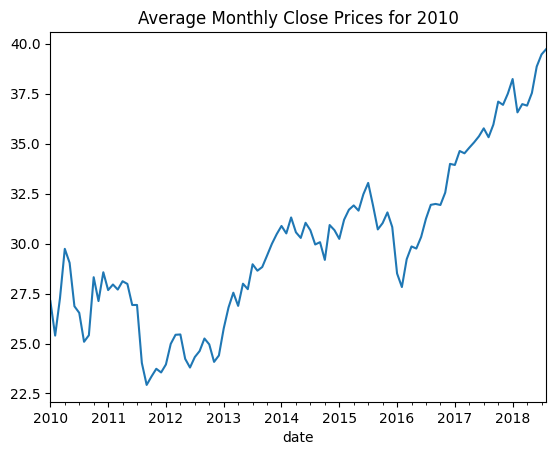

/tmp/ipython-input-2139836836.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = decade_df['close'].resample('M').mean()


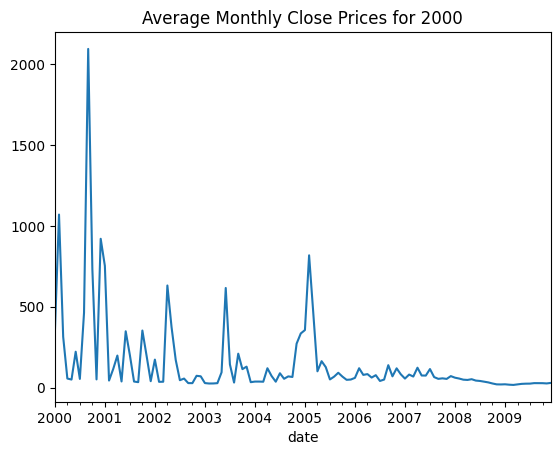

/tmp/ipython-input-2139836836.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = decade_df['close'].resample('M').mean()


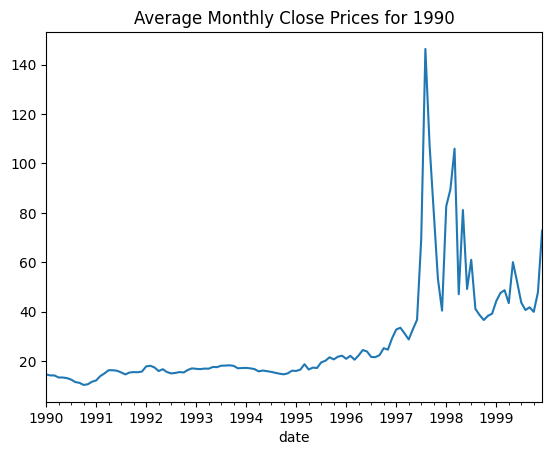

/tmp/ipython-input-2139836836.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = decade_df['close'].resample('M').mean()


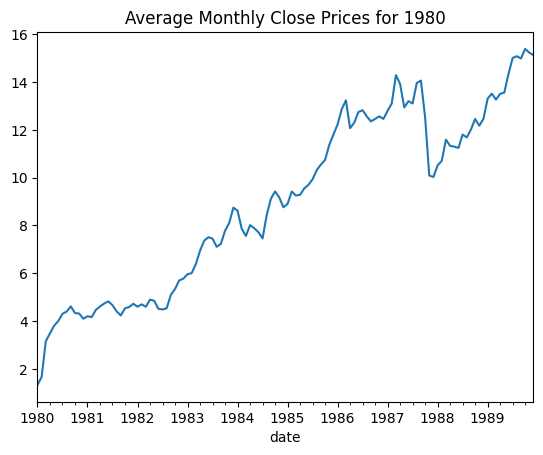

/tmp/ipython-input-2139836836.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = decade_df['close'].resample('M').mean()


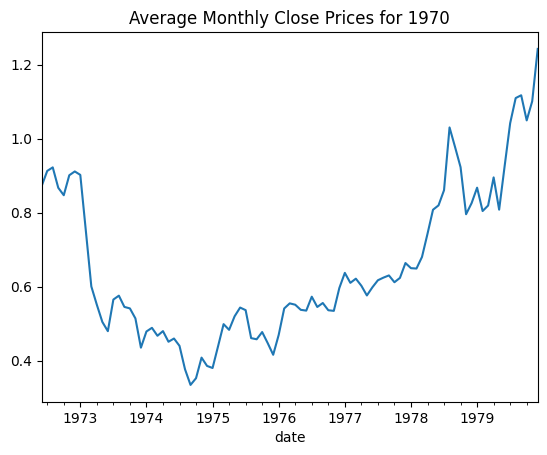

In [ ]:
# Task 4 Contd: Visualizations for each decade
# Time series plots for average monthly Close prices.
# Loop through each decade and its corresponding DataFrame
for decade, decade_df in decade_dfs.items():

    # Resample the 'close' prices to monthly frequency and calculate the mean
    monthly_avg = decade_df['close'].resample('M').mean()

    # Plot the average monthly close prices with a title indicating the decade
    monthly_avg.plot(title=f'Average Monthly Close Prices for {decade}')

    # Display the plot
    plt.show()


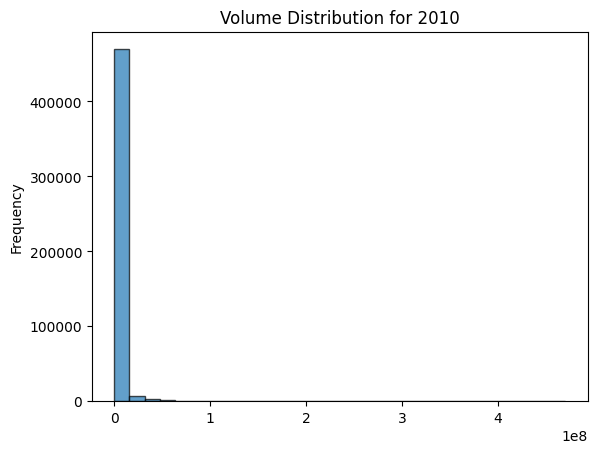

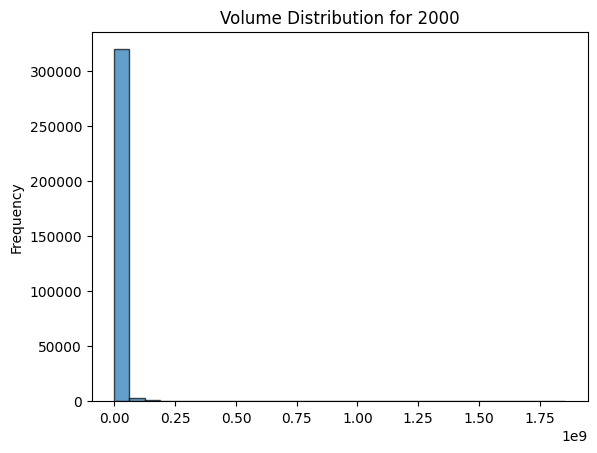

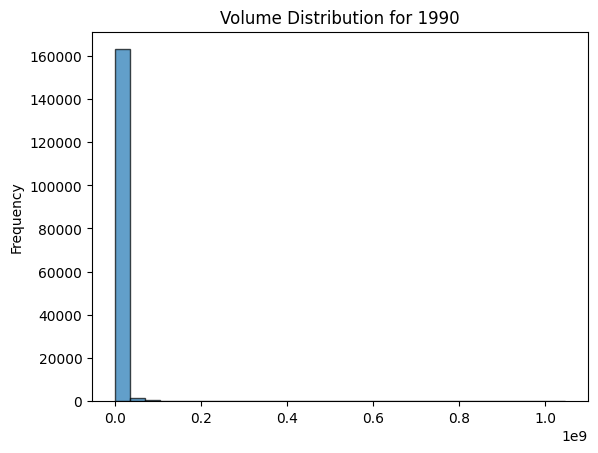

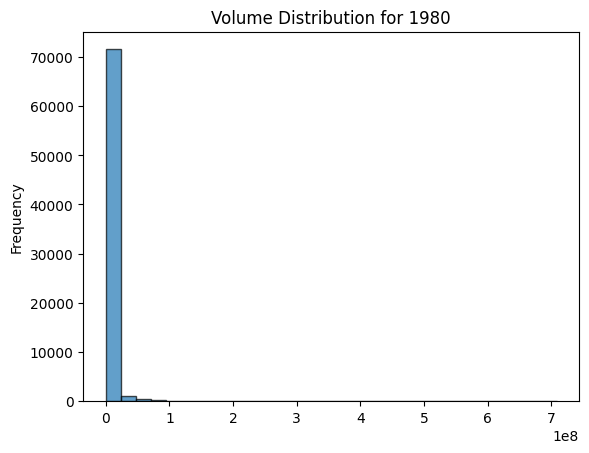

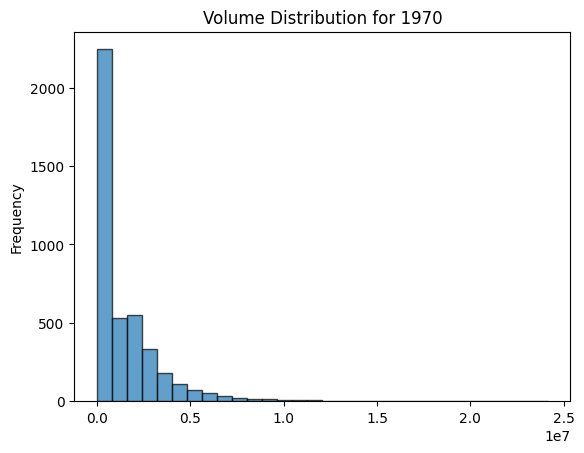

In [ ]:
# Task 4 contd: Visualization
# Histograms for Volume to analyze the distribution and any shifts over the decades.
# Loop through each decade and its corresponding DataFrame
for decade, decade_df in decade_dfs.items():

    # Plot a histogram of the 'volume' column to show distribution
    decade_df['volume'].plot(
        kind='hist',
        title=f'Volume Distribution for {decade}',
        bins=30,
        alpha=0.7,      # set transparency for better visibility
        edgecolor='black'  #  add borders to bars
    )

    # Display the plot
    plt.show()
    print()

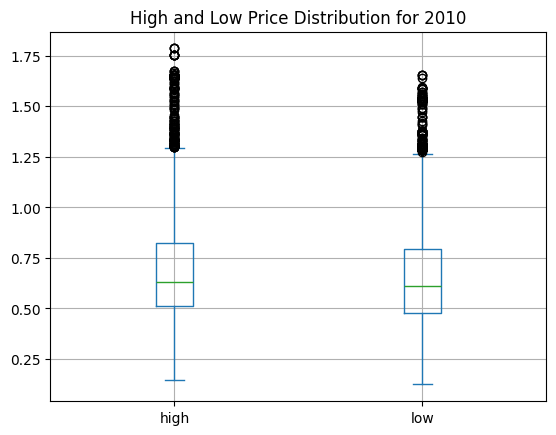

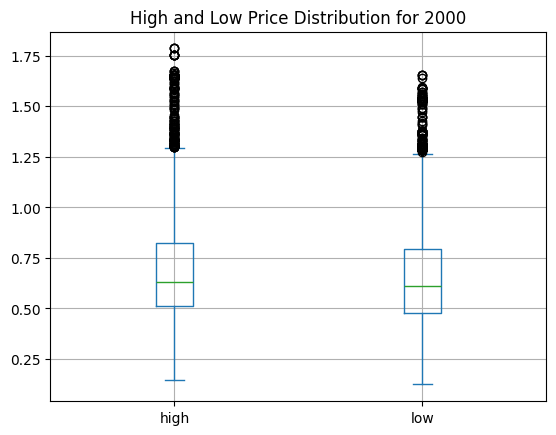

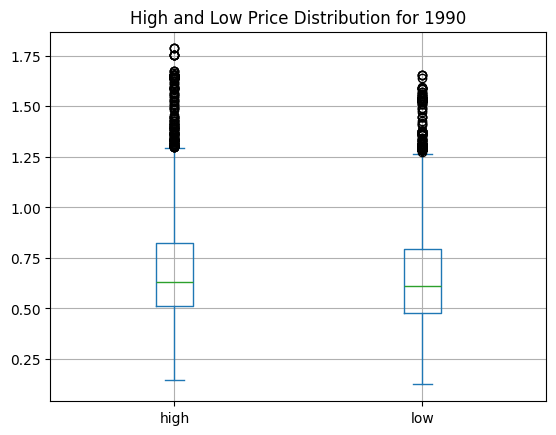

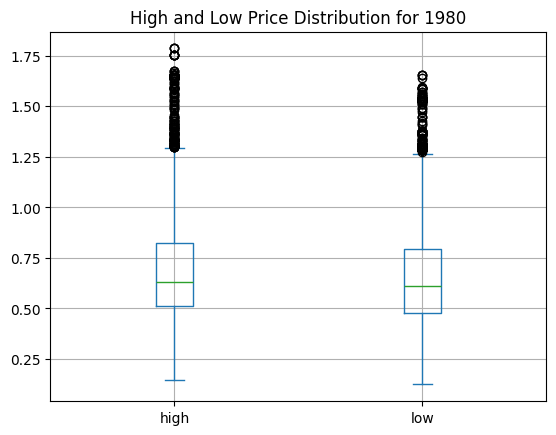

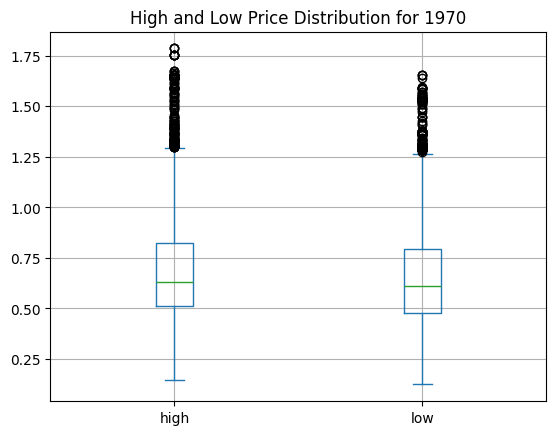

In [ ]:
# Visualizations
# Box plots for the High and Low prices to examine the range and presence of outliers.
# Loop through each decade and its corresponding DataFrame
for decade, df in decade_dfs.items():

    # Create a box plot for 'High' and 'Low' prices to examine range and outliers
    decade_df[['high', 'low']].plot(
        kind='box',
        title=f'High and Low Price Distribution for {decade}',
        grid=True
    )

    # Display the plot
    plt.show()
    print()